<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [64]:
import torch
import nltk
import numpy as np
import pandas as pd
from pandarallel import pandarallel
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /Users/ahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)

In [4]:
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [5]:
df.groupby('category')['abstracts'].describe()

,count,unique,top,freq
category,,,,
cs.CV,21619,21619,Predicting depth from a single image is an att...,1
cs.LG,16603,16603,"Recently, generating adversarial examples has ...",1
stat.ML,2878,2878,State space models (SSMs) provide a flexible f...,1


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [6]:
#TODO

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [7]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [8]:
df['preprocessed'] = df['titles'].str.cat(df['abstracts'], ' ').parallel_apply(preprocess_text)
df

,terms,titles,abstracts,category,preprocessed
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura..."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep..."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,..."
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different..."
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo..."
...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv..."
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s..."
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat..."
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech..."


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [9]:
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['preprocessed'].apply(' '.join).tolist())

In [10]:
vectorizer.get_feature_names_out()[40000:40010]

array(['octconv', 'octet', 'octfcn', 'octid', 'octnet', 'octo', 'october',
       'octonion', 'octopus', 'octree'], dtype=object)

In [11]:
doc_word.shape

(41100, 63211)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(doc_word.toarray(), df['category'], test_size=0.2, random_state=13)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [52]:
class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.classes = None
        self.alpha = alpha

    def fit(self, x, y):
        """
        Fit the features and the labels
        Calculate prior, word_counts and lk_word

        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc

        Returns
        -------
        self
            Returns self as a classifier
        """
        m, n = x.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.prior = np.zeros(n_classes)
        self.word_counts = np.zeros((n_classes, n))
        self.lk_word = np.zeros((n_classes, n))
        for i, c in enumerate(self.classes):
            x_c = x[c == y]
            self.prior[i] = x_c.shape[0] / m
            self.word_counts[i, :] = x_c.sum(axis=0)
            self.lk_word[i, :] = (self.word_counts[i, :] + self.alpha) / (self.word_counts[i, :].sum() + self.alpha * n)
        return self

    def predict(self, x: np.ndarray):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count
            of docs and n is vocabulary size

        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        """
        y_hat = np.log(self.prior) + x @ np.log(self.lk_word.T)
        return self.classes[np.argmax(y_hat, axis=1)]

In [53]:
# use your classifier to fit on the training data
# then try to predict classes of test data

nb = NaiveBayes()
nb.fit(X_train, y_train)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [58]:
p_test = nb.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, p_test)
print("Accuracy:", acc)

# Micro metrics
micro_recall = recall_score(y_test, p_test, average='micro')
micro_precision = precision_score(y_test, p_test, average='micro')
micro_f1 = f1_score(y_test, p_test, average='micro')

print("Micro Recall:", micro_recall)
print("Micro Precision:", micro_precision)
print("Micro F1:", micro_f1)

# Macro metrics
macro_recall = recall_score(y_test, p_test, average='macro')
macro_precision = precision_score(y_test, p_test, average='macro')
macro_f1 = f1_score(y_test, p_test, average='macro')

print("Macro Recall:", macro_recall)
print("Macro Precision:", macro_precision)
print("Macro F1:", macro_f1)

Accuracy: 0.8510948905109489
Micro Recall: 0.8510948905109489
Micro Precision: 0.8510948905109489
Micro F1: 0.8510948905109489
Macro Recall: 0.7293484654494146
Macro Precision: 0.7274633683094304
Macro F1: 0.7283367170511735


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

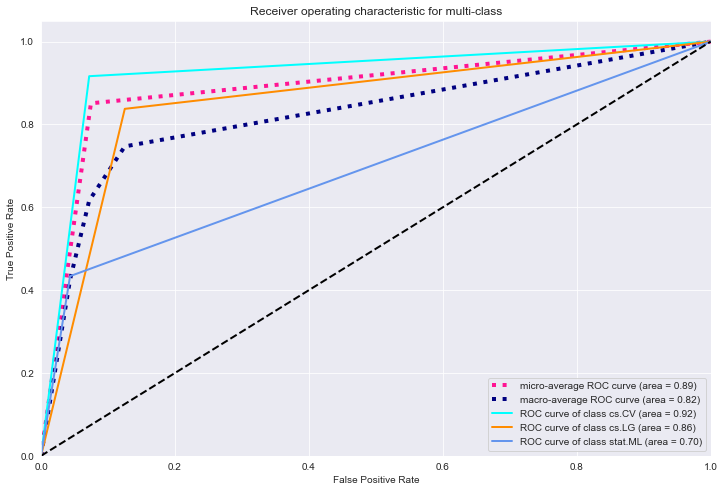

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming p_test is an array of predicted probabilities for each class
# with shape (num_samples, num_classes)
y_score = label_binarize(p_test, classes=nb.classes)

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=nb.classes)

# Compute ROC curve and ROC area for each class
n_classes = y_test_one_hot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_one_hot[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_one_hot, y_score, average="micro")

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test_one_hot, y_score, average="macro")

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(nb.classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')

plt.legend(loc="lower right")
plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

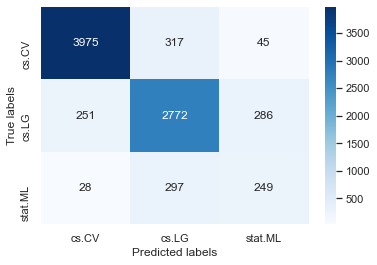

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix(y_test, p_test, labels):
    n_labels = len(labels)
    c2i = {label: i for i, label in enumerate(labels)}
    cm = np.zeros((n_labels, n_labels), dtype=np.int32)
    for i, j in zip(y_test, p_test):
        cm[c2i[i], c2i[j]] += 1
    return cm


cm = confusion_matrix(y_test, p_test, nb.classes)
# Plot the confusion matrix as a heatmap
sns.set()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=nb.classes, yticklabels=nb.classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [100]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed
import tempfile
from typing import List, Tuple

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from pandarallel import pandarallel

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

In [2]:
pandarallel.initialize()
nltk.download('punkt')
nltk.download('stopwords')

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /Users/ahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [3]:
# read data
df = pd.read_csv('./data/arxiv/arxiv_data_210930-054931.csv')
df['category'] = df['terms'].apply(lambda l: eval(l)[0])
df = df.drop_duplicates(['titles']).drop_duplicates(['abstracts']).reset_index(drop=True)
df

,terms,titles,abstracts,category
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG
...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG


In [4]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [5]:
# preprocess text
df['preprocessed'] = df['titles'].str.cat(df['abstracts'], ' ').parallel_apply(preprocess_text)
df

,terms,titles,abstracts,category,preprocessed
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura..."
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep..."
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,..."
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different..."
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo..."
...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv..."
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s..."
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat..."
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech..."


---------------------------------------- lengths statistics ----------------------------------------
count    41100.000000
mean       116.203114
std         29.988946
min         11.000000
25%         95.000000
50%        115.000000
75%        136.000000
max        303.000000
Name: preprocessed, dtype: float64


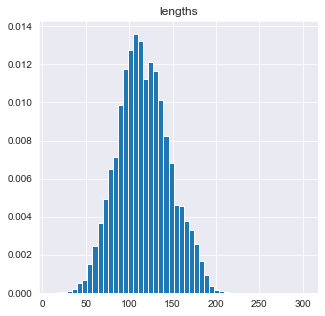

In [6]:
# perform data cleaning and eda (you can add cells here)
# Text length

lens = df['preprocessed'].apply(len)

print(' lengths statistics '.center(100, '-'))
print(lens.describe())

plt.figure(figsize=(5, 5))
plt.hist(lens, bins=50, density=True)
plt.title('lengths')
plt.show()

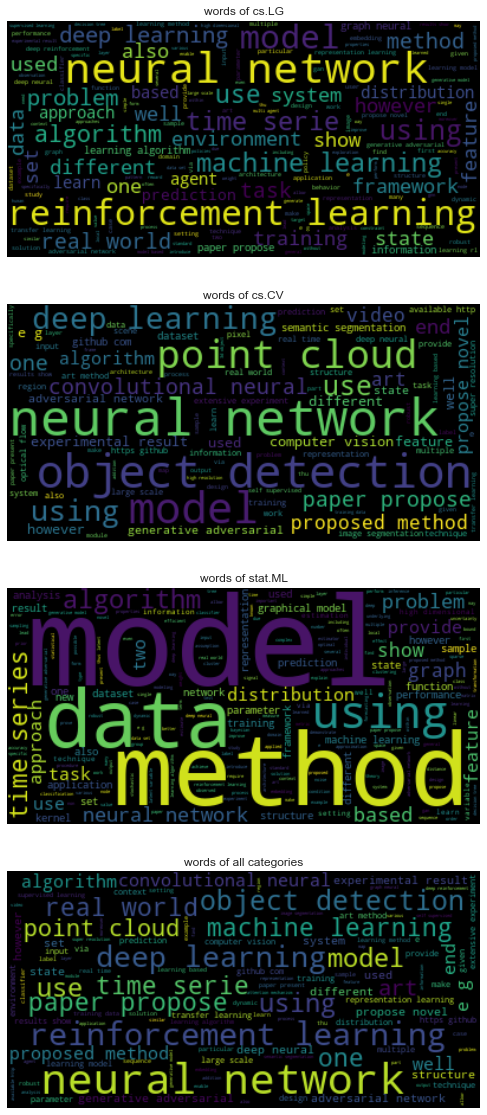

In [7]:
# Word-clouds grouped by category

stops = nltk.corpus.stopwords.words('english')

categories = df.category.unique()

plt.figure(figsize=(10, 20))
for i, category in enumerate(categories):
    plt.subplot(len(categories) + 1, 1, i + 1)
    plt.imshow(WordCloud(stopwords=stops)\
               .generate(' '.join(df[df.category == category]['preprocessed'].str.join(' '))), interpolation='bilinear')
    plt.title(f'words of {category}')
    plt.axis('off')

plt.subplot(len(categories) + 1, 1, len(categories) + 1)
plt.imshow(WordCloud(stopwords=stops).generate(' '.join(df['preprocessed'].str.join(' '))), interpolation='bilinear')
plt.title('words of all categories')
plt.axis('off')

plt.show()

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [32]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with tempfile.NamedTemporaryFile('w') as tmp:
            print('\n'.join([' '.join(text) for text in texts]), file=tmp)
            tmp.seek(0)
            self.model = fasttext.train_unsupervised(input=tmp.name, model=self.method, dim=100)

    def get_query_embedding(self, query: str, tf_idf_vectorizer: TfidfVectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        query = self.preprocessor(query) if self.preprocessor else query.split()
        w = tf_idf_vectorizer.transform([' '.join(query)])
        emb = np.zeros(100)
        for word in query:
            try:
                emb += self.model.get_word_vector(word) * w[0, tf_idf_vectorizer.vocabulary_[word]]
            except:
                pass
        return emb

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [9]:
FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(df['preprocessed'], mode='train', save=True)
# FastText_model.prepare(preprocessed_total, mode='load')

Read 4M words
Number of words:  25446
Number of labels: 0
Progress: 100.0% words/sec/thread:   53160 lr:  0.000000 avg.loss:  2.144429 ETA:   0h 0m 0s 87.0% words/sec/thread:   53311 lr:  0.006497 avg.loss:  2.140517 ETA:   0h 0m 8s


In [33]:
a = FastText(preprocessor=preprocess_text)
a.model = FastText_model.model
FastText_model = a

In [10]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.9004794955253601, 'covid19'),
 (0.8948888182640076, 'covid-19'),
 (0.8449240326881409, 'dr-covid'),
 (0.7779137492179871, 'pandemic'),
 (0.7598943710327148, 'coronavirus'),
 (0.7466009259223938, 'outbreak'),
 (0.7437993884086609, 'pandemics'),
 (0.7184562087059021, 'virus'),
 (0.7172079682350159, 'outbreaks'),
 (0.713232159614563, 'sars-cov-2')]

In [11]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit([' '.join(text) for text in data])

In [12]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(df['preprocessed'])

In [34]:
text =  "backpropagation is good"
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 4.56533618e-01, -5.80638021e-01, -1.81527201e-01, -2.16095880e-01,
       -1.24717396e-01,  6.42307460e-01, -2.60594584e-01, -9.09045339e-05,
       -4.86424556e-01, -2.09519811e-01, -1.81390807e-01, -7.92499206e-02,
        4.64353576e-01,  3.09070235e-01, -2.15930492e-02,  1.30025975e-01,
       -7.23478552e-02,  7.93819204e-02,  4.09111448e-01, -4.23718378e-01,
       -1.77764378e-01,  7.22046420e-02,  7.53080184e-02, -3.60301025e-01,
       -4.53566033e-01, -2.12598789e-01,  2.31150970e-01,  9.96873900e-03,
        4.04227423e-01,  2.68471316e-01, -6.04774535e-01,  2.49652302e-01,
        4.15283442e-02,  5.60377643e-02,  7.06024482e-02, -1.22844398e-01,
        7.39796072e-01, -1.74514949e-04,  5.64063415e-02,  3.82154793e-01,
       -1.44199632e-01,  2.14009352e-01, -1.89656213e-01,  2.87630493e-01,
        7.23036289e-01,  3.85002069e-01, -6.86385870e-01, -4.59521890e-01,
       -1.27974108e-01, -1.79533079e-01, -3.63052677e-01, -3.36158425e-02,
        1.01377562e-01, -


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [83]:
df['X'] = df['preprocessed'].str.join(' ').parallel_apply(lambda text: FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer).astype('float32'))
categories = sorted(df['category'].unique())
df['y'] = df['category'].parallel_apply(lambda c: categories.index(c))
df

,terms,titles,abstracts,category,preprocessed,X,y
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...,cs.LG,"[multi-level, attention, pooling, graph, neura...","[1.5898564, -3.418092, -2.585042, -0.5307765, ...",1
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...,cs.LG,"[decision, forests, vs, deep, networks, concep...","[0.6979045, -4.7529025, -0.7754821, -0.0070779...",1
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...,cs.LG,"[power, robust, graph, convolutional, network,...","[0.55848825, -1.8322413, -0.9542572, -0.718717...",1
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...,cs.LG,"[releasing, graph, neural, networks, different...","[0.8696009, -5.9141235, -3.0478585, -0.3929406...",1
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...,cs.LG,"[recurrence-aware, long-term, cognitive, netwo...","[0.11888688, -3.95177, -1.6343497, -0.47888973...",1
...,...,...,...,...,...,...,...
41095,['stat.ML'],An experimental study of graph-based semi-supe...,The volume of data generated by internet and s...,stat.ML,"[experimental, study, graph-based, semi-superv...","[0.35114813, -3.53171, -1.6780801, -0.17863704...",2
41096,"['stat.ML', 'cs.LG']",Bayesian Differential Privacy through Posterio...,Differential privacy formalises privacy-preser...,stat.ML,"[bayesian, differential, privacy, posterior, s...","[1.542231, -4.380969, -2.3013177, 0.109984696,...",2
41097,"['cs.CV', 'cs.IR']",Mining Spatio-temporal Data on Industrializati...,Despite the growing availability of big data i...,cs.CV,"[mining, spatio-temporal, data, industrializat...","[1.270315, -3.8644702, -1.3904585, 1.9930941, ...",0
41098,"['cs.LG', 'cs.AI', 'cs.CL', 'I.2.6; I.2.7']",Wav2Letter: an End-to-End ConvNet-based Speech...,This paper presents a simple end-to-end model ...,cs.LG,"[wav2letter, end-to-end, convnet-based, speech...","[0.7576671, -2.9095733, -0.82664543, 0.8073877...",1


## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [84]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: List[np.ndarray], labels: List[int]):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self) -> int:
        return len(self.embeddings)

    def __getitem__(self, i: int) -> Tuple[np.ndarray, int]:
        return self.embeddings[i], self.labels[i]

In [85]:
TRAIN_BATCH_SIZE = 512
EVAL_BATCH_SIZE = 1024

In [86]:
dataset = PapersDataSet(df['X'].tolist(), df['y'].tolist())
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [
    int(len(dataset) * 0.8),
    int(len(dataset) * 0.1),
    int(len(dataset) * 0.1),
])
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=EVAL_BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=EVAL_BATCH_SIZE, shuffle=False)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [87]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(128, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [92]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [93]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [94]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    model.eval()
    eval_loss = 0
    epoch_all = 0
    epoch_true = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        with tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
            for i, (X, y) in pbar:
                X = X.to(device)
                y = y.to(device)
                y_pred = model(X)
                loss = criterion(y_pred, y)
                eval_loss += loss.item()
                epoch_all += len(y)
                epoch_true += (y_pred.argmax(dim=1) == y).sum().item()
                predicted_labels.extend(y_pred.argmax(dim=1).tolist())
                true_labels.extend(y.tolist())
                pbar.set_postfix(dict(
                    loss=eval_loss / (i + 1),
                    accuracy=epoch_true / epoch_all,
                    f1_score_macro=f1_score(true_labels, predicted_labels, average='macro'),
                ))
                pbar.set_description(f"{'Test' if test_mode else 'Validation'} Epoch {epoch + 1}")
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
    eval_loss /= len(dataloader)
    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [95]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores = []
for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (X, y) in pbar:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            epoch_all += len(y)
            epoch_true += (y_pred.argmax(dim=1) == y).sum().item()
            pbar.set_postfix(dict(
                loss=train_loss / (i + 1),
                accuracy=epoch_true / epoch_all,
            ))
            pbar.set_description(f"Train Epoch {epoch + 1}")
  
    model.eval()
    
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores.append(f1_score_macro)
    
    end_time = time()
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

Validation Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 58.85it/s, loss=0.38, accuracy=0.828, f1_score_macro=0.636]


Epoch 1 finished in 1.09s
[Epoch 1]	Train Loss: 0.0011	Validation Loss: 0.0001	 F1 score macro: 0.6358778218986195


Validation Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 71.20it/s, loss=0.369, accuracy=0.827, f1_score_macro=0.628]


Epoch 2 finished in 1.04s
[Epoch 2]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6280954426909521


Validation Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 72.84it/s, loss=0.364, accuracy=0.833, f1_score_macro=0.682]


Epoch 3 finished in 1.08s
[Epoch 3]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6823673799128792


Validation Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 62.63it/s, loss=0.359, accuracy=0.828, f1_score_macro=0.627]


Epoch 4 finished in 2.01s
[Epoch 4]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6274646051309182


Validation Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 66.52it/s, loss=0.353, accuracy=0.838, f1_score_macro=0.686]


Epoch 5 finished in 1.04s
[Epoch 5]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6857664253300739


Validation Epoch 6: 100%|██████████| 5/5 [00:00<00:00, 65.51it/s, loss=0.348, accuracy=0.833, f1_score_macro=0.643]


Epoch 6 finished in 1.02s
[Epoch 6]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.642526885339465


Validation Epoch 7: 100%|██████████| 5/5 [00:00<00:00, 66.37it/s, loss=0.349, accuracy=0.839, f1_score_macro=0.695]


Epoch 7 finished in 1.01s
[Epoch 7]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6954715788523184


Validation Epoch 8: 100%|██████████| 5/5 [00:00<00:00, 68.72it/s, loss=0.345, accuracy=0.838, f1_score_macro=0.675]


Epoch 8 finished in 1.01s
[Epoch 8]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6752960759482741


Validation Epoch 9: 100%|██████████| 5/5 [00:00<00:00, 64.75it/s, loss=0.352, accuracy=0.842, f1_score_macro=0.702]


Epoch 9 finished in 1.01s
[Epoch 9]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.7023612700020898


Validation Epoch 10: 100%|██████████| 5/5 [00:00<00:00, 69.04it/s, loss=0.345, accuracy=0.84, f1_score_macro=0.662]


Epoch 10 finished in 1.06s
[Epoch 10]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6615844363823252


Validation Epoch 11: 100%|██████████| 5/5 [00:00<00:00, 68.91it/s, loss=0.344, accuracy=0.841, f1_score_macro=0.699]


Epoch 11 finished in 1.01s
[Epoch 11]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6987406254370158


Validation Epoch 12: 100%|██████████| 5/5 [00:00<00:00, 70.21it/s, loss=0.341, accuracy=0.842, f1_score_macro=0.689]


Epoch 12 finished in 1.02s
[Epoch 12]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.6888204357129935


Validation Epoch 13: 100%|██████████| 5/5 [00:00<00:00, 67.31it/s, loss=0.346, accuracy=0.841, f1_score_macro=0.687]


Epoch 13 finished in 1.03s
[Epoch 13]	Train Loss: 0.0008	Validation Loss: 0.0001	 F1 score macro: 0.687173424882325


Validation Epoch 14: 100%|██████████| 5/5 [00:00<00:00, 66.33it/s, loss=0.342, accuracy=0.841, f1_score_macro=0.686]


Epoch 14 finished in 1.08s
[Epoch 14]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.686083536271889


Validation Epoch 15: 100%|██████████| 5/5 [00:00<00:00, 66.29it/s, loss=0.339, accuracy=0.84, f1_score_macro=0.667]


Epoch 15 finished in 1.06s
[Epoch 15]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6668636010795681


Validation Epoch 16: 100%|██████████| 5/5 [00:00<00:00, 66.86it/s, loss=0.336, accuracy=0.844, f1_score_macro=0.688]


Epoch 16 finished in 1.02s
[Epoch 16]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6880902380043273


Validation Epoch 17: 100%|██████████| 5/5 [00:00<00:00, 73.12it/s, loss=0.343, accuracy=0.845, f1_score_macro=0.687]


Epoch 17 finished in 1.09s
[Epoch 17]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6866342469214898


Validation Epoch 18: 100%|██████████| 5/5 [00:00<00:00, 71.36it/s, loss=0.338, accuracy=0.846, f1_score_macro=0.689]


Epoch 18 finished in 1.04s
[Epoch 18]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6885995468795238


Validation Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 67.19it/s, loss=0.337, accuracy=0.846, f1_score_macro=0.689]


Epoch 19 finished in 1.05s
[Epoch 19]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6893263232225477


Validation Epoch 20: 100%|██████████| 5/5 [00:00<00:00, 69.82it/s, loss=0.341, accuracy=0.848, f1_score_macro=0.691]


Epoch 20 finished in 1.02s
[Epoch 20]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6906738475821923


Validation Epoch 21: 100%|██████████| 5/5 [00:00<00:00, 69.41it/s, loss=0.333, accuracy=0.846, f1_score_macro=0.696]


Epoch 21 finished in 1.03s
[Epoch 21]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6962336205811331


Validation Epoch 22: 100%|██████████| 5/5 [00:00<00:00, 69.25it/s, loss=0.336, accuracy=0.839, f1_score_macro=0.671]


Epoch 22 finished in 1.01s
[Epoch 22]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6705172669955927


Validation Epoch 23: 100%|██████████| 5/5 [00:00<00:00, 67.90it/s, loss=0.338, accuracy=0.842, f1_score_macro=0.678]


Epoch 23 finished in 1.02s
[Epoch 23]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.678122930734879


Validation Epoch 24: 100%|██████████| 5/5 [00:00<00:00, 67.91it/s, loss=0.344, accuracy=0.848, f1_score_macro=0.705]


Epoch 24 finished in 1.02s
[Epoch 24]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7052489564409655


Validation Epoch 25: 100%|██████████| 5/5 [00:00<00:00, 69.97it/s, loss=0.339, accuracy=0.845, f1_score_macro=0.696]


Epoch 25 finished in 1.03s
[Epoch 25]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6962537927131133


Validation Epoch 26: 100%|██████████| 5/5 [00:00<00:00, 68.62it/s, loss=0.342, accuracy=0.844, f1_score_macro=0.69]


Epoch 26 finished in 1.01s
[Epoch 26]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6900920347144717


Validation Epoch 27: 100%|██████████| 5/5 [00:00<00:00, 64.18it/s, loss=0.337, accuracy=0.839, f1_score_macro=0.685]


Epoch 27 finished in 1.05s
[Epoch 27]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6847072650028315


Validation Epoch 28: 100%|██████████| 5/5 [00:00<00:00, 68.60it/s, loss=0.34, accuracy=0.847, f1_score_macro=0.692]


Epoch 28 finished in 1.10s
[Epoch 28]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.692358106215064


Validation Epoch 29: 100%|██████████| 5/5 [00:00<00:00, 68.36it/s, loss=0.347, accuracy=0.846, f1_score_macro=0.708]


Epoch 29 finished in 1.05s
[Epoch 29]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7084623648120032


Validation Epoch 30: 100%|██████████| 5/5 [00:00<00:00, 67.59it/s, loss=0.345, accuracy=0.846, f1_score_macro=0.714]


Epoch 30 finished in 1.02s
[Epoch 30]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7139659459781411


Validation Epoch 31: 100%|██████████| 5/5 [00:00<00:00, 69.61it/s, loss=0.339, accuracy=0.842, f1_score_macro=0.689]


Epoch 31 finished in 1.02s
[Epoch 31]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6885177982857131


Validation Epoch 32: 100%|██████████| 5/5 [00:00<00:00, 66.08it/s, loss=0.347, accuracy=0.849, f1_score_macro=0.707]


Epoch 32 finished in 1.02s
[Epoch 32]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7065486498074226


Validation Epoch 33: 100%|██████████| 5/5 [00:00<00:00, 66.65it/s, loss=0.34, accuracy=0.842, f1_score_macro=0.709]


Epoch 33 finished in 1.03s
[Epoch 33]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7085445602650678


Validation Epoch 34: 100%|██████████| 5/5 [00:00<00:00, 67.09it/s, loss=0.35, accuracy=0.843, f1_score_macro=0.679]


Epoch 34 finished in 1.03s
[Epoch 34]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6789273737411943


Validation Epoch 35: 100%|██████████| 5/5 [00:00<00:00, 68.04it/s, loss=0.341, accuracy=0.838, f1_score_macro=0.679]


Epoch 35 finished in 1.03s
[Epoch 35]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.678944092089992


Validation Epoch 36: 100%|██████████| 5/5 [00:00<00:00, 66.68it/s, loss=0.339, accuracy=0.847, f1_score_macro=0.682]


Epoch 36 finished in 1.06s
[Epoch 36]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6822932116514361


Validation Epoch 37: 100%|██████████| 5/5 [00:00<00:00, 67.37it/s, loss=0.334, accuracy=0.844, f1_score_macro=0.673]


Epoch 37 finished in 1.02s
[Epoch 37]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6731906519396541


Validation Epoch 38: 100%|██████████| 5/5 [00:00<00:00, 64.93it/s, loss=0.333, accuracy=0.838, f1_score_macro=0.675]


Epoch 38 finished in 1.03s
[Epoch 38]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6745175243912227


Validation Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 66.75it/s, loss=0.338, accuracy=0.838, f1_score_macro=0.672]


Epoch 39 finished in 1.03s
[Epoch 39]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6715460621197539


Validation Epoch 40: 100%|██████████| 5/5 [00:00<00:00, 56.61it/s, loss=0.339, accuracy=0.849, f1_score_macro=0.701]


Epoch 40 finished in 1.09s
[Epoch 40]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7005073072369036


Validation Epoch 41: 100%|██████████| 5/5 [00:00<00:00, 67.06it/s, loss=0.334, accuracy=0.846, f1_score_macro=0.681]


Epoch 41 finished in 1.01s
[Epoch 41]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6813887814177249


Validation Epoch 42: 100%|██████████| 5/5 [00:00<00:00, 62.91it/s, loss=0.34, accuracy=0.843, f1_score_macro=0.706]


Epoch 42 finished in 1.03s
[Epoch 42]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7056408760087414


Validation Epoch 43: 100%|██████████| 5/5 [00:00<00:00, 68.01it/s, loss=0.335, accuracy=0.847, f1_score_macro=0.678]


Epoch 43 finished in 1.01s
[Epoch 43]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.678266809625017


Validation Epoch 44: 100%|██████████| 5/5 [00:00<00:00,  7.09it/s, loss=0.335, accuracy=0.847, f1_score_macro=0.697]


Epoch 44 finished in 1.67s
[Epoch 44]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6967642242251258


Validation Epoch 45: 100%|██████████| 5/5 [00:00<00:00, 69.23it/s, loss=0.344, accuracy=0.848, f1_score_macro=0.718]


Epoch 45 finished in 1.08s
[Epoch 45]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7182991418400738


Validation Epoch 46: 100%|██████████| 5/5 [00:00<00:00, 67.81it/s, loss=0.359, accuracy=0.847, f1_score_macro=0.712]


Epoch 46 finished in 1.03s
[Epoch 46]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.7115883691701484


Validation Epoch 47: 100%|██████████| 5/5 [00:00<00:00, 65.74it/s, loss=0.336, accuracy=0.844, f1_score_macro=0.678]


Epoch 47 finished in 1.02s
[Epoch 47]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.678222987611159


Validation Epoch 48: 100%|██████████| 5/5 [00:00<00:00, 66.12it/s, loss=0.342, accuracy=0.847, f1_score_macro=0.713]


Epoch 48 finished in 1.03s
[Epoch 48]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.7130398441831095


Validation Epoch 49: 100%|██████████| 5/5 [00:00<00:00, 67.62it/s, loss=0.343, accuracy=0.847, f1_score_macro=0.686]


Epoch 49 finished in 1.03s
[Epoch 49]	Train Loss: 0.0006	Validation Loss: 0.0001	 F1 score macro: 0.6857033981497646


Validation Epoch 50: 100%|██████████| 5/5 [00:00<00:00, 67.38it/s, loss=0.376, accuracy=0.837, f1_score_macro=0.673]


Epoch 50 finished in 1.01s
[Epoch 50]	Train Loss: 0.0007	Validation Loss: 0.0001	 F1 score macro: 0.6730576751371258


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

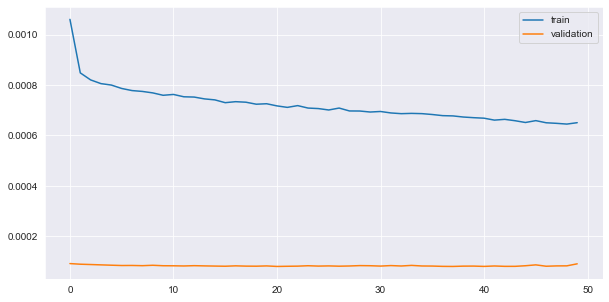

In [96]:
# todo: plot the train and validation loss by epoch

plt.figure(figsize=(10, 5))
plt.plot(train_loss_arr, label='train')
plt.plot(val_loss_arr, label='validation')
plt.legend()
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

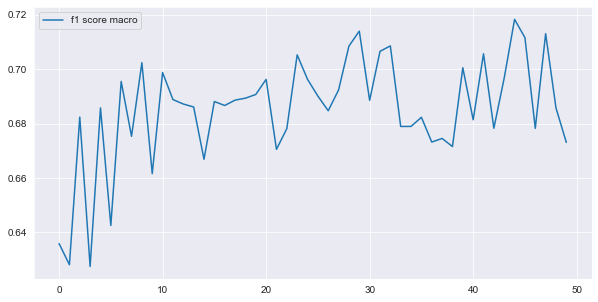

In [97]:
# todo: plot the f1 score by epoch

plt.figure(figsize=(10, 5))
plt.plot(f1_macro_scores, label='f1 score macro')
plt.legend()
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [101]:
# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)
accuracy = accuracy_score(true_labels, predicted_labels)
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
cm = confusion_matrix(true_labels, predicted_labels)
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
print(f"Accuracy: {accuracy}")
print(f"Loss: {eval_loss}")
print(f"F1-Macro: {f1_score_macro}")
print(f"F1-Micro: {f1_score_micro}")
print(f"Confusion matrix: {cm}")
print(f"Macro-average precision: {precision_macro}")
print(f"Macro-average recall: {recall_macro}")
print(f"Micro-average precision: {precision_micro}")
print(f"Micro-average recall: {recall_micro}")

Test Epoch 50: 100%|██████████| 5/5 [00:00<00:00, 69.41it/s, loss=0.404, accuracy=0.843, f1_score_macro=0.664]

Accuracy: 0.843065693430657
Loss: 0.4035329818725586
F1-Macro: 0.6636725063077994
F1-Micro: 0.843065693430657
Confusion matrix: [[2055   92    2]
 [ 280 1361   42]
 [  34  195   49]]
Macro-average precision: 0.7400619523988919
Macro-average recall: 0.6470642343132319
Micro-average precision: 0.843065693430657
Micro-average recall: 0.843065693430657


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [106]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    embedding = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer).astype(np.float32)
    embedding = torch.tensor(embedding).unsqueeze(0).to(device)
    output = model(embedding)
    _, predicted = torch.max(output.data, 1)
    return categories[predicted.item()]

In [108]:
predict('hardware and computerc architecture is good')

'cs.CV'

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [ ]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [ ]:
# read data
df = pd.read_csv('./arxiv_data.csv')

In [ ]:
# perform data cleaning and eda (you can add cells here)
# todo

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    # todo
    normalized_tokens = None
    return normalized_tokens

In [ ]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
df.head()

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [ ]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test






random_state = 1
X_train, X_test, y_train, y_test = None

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [ ]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# todo 
# you can add more cells here if you need
model = None
model_2 = None
tokenizer = None

In [ ]:
# todo
train_encodings = None
test_encodings = None

In [ ]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        pass

    def __getitem__(self, idx):
        pass

    def __len__(self):
        pass

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

In [ ]:
# todo
# fine tune bert and train model
training_args = None

trainer = None

trainer.train()

In [ ]:
# todo
# freeze bert weights and then train model_2
training_args = None

trainer = None

trainer.train()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# you can add more cells here if you need
# todo
y_pred_transformers = []
y_pred_transformers_2 = []

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    predicted_class = None
    return predicted_class

In [ ]:
predict('hardware is very good.', model)

In [ ]:
# It is highly recommended to save your final models
# todo

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [ ]:
def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, print=False, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    # TODO: retun top 'max_result_count' documents for your searched query

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """

    # TODO: Extract a vector for each input document using a transformer-based language model 
    pass
docs_embedding = extract_embedding([str, str, str, ...]) # return [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector 
    pass
docs_embedding_2d = convert_to_2d_tsne([[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



In [ ]:
## ؟ points

from typing import List

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color.
    pass

plot_docs([[NUM, NUM], [NUM, NUM], [NUM, NUM], ...])

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method 
    pass

cluster_centers, cluster_kmeans = cluster_kmeans([[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]]) # return [NUM, NUM, NUM, ...]

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
#TODO: silhouette analysis 

In [ ]:
#TODO: plot purity for different value of k

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#TODO

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [ ]:
## ؟ points

from typing import List

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    # TODO: Implement a function to find similar documents to input document.
    pass

find_similar_docs(int, int, [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])